Assignment 2 (due on 11/8)

学生：宋羽璇 (12332310)

批改人：Zhao Shuhui

得分：18/50

=========================================
# 1 Significant Earthquakes
12/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数 5/5  
1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——完成了筛选工作；时间序列绘画失误，注意数量为0的年份；报告中未陈述趋势及理由  6/10  
1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序——方法思路正确但实现有误，不能返回地震数量和特定日期，且没有进行接下来的处理  1/10

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1.1

In [31]:
Sig_Eqs = pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv",sep='\t')

In [8]:
Sig_Eqs

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,NaN,10708.0,2023.0,10.0,7.0,6.0,41.0,3.0,NaN,NaN,...,NaN,NaN,1950.0,4.0,NaN,3.0,2862.0,4.0,250.0,3.0
6394,NaN,10711.0,2023.0,10.0,7.0,8.0,40.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,200.0,3.0,NaN,2.0
6395,NaN,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6396,NaN,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN


In [7]:
c=Sig_Eqs.groupby(['Country']).sum()['Deaths']
Sig_Eqs.groupby(['Country']).sum()['Deaths']

Country
AFGHANISTAN                             15644.0
ALBANIA                                  3132.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44480.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4192.0
ZAMBIA                                      0.0
Name: Deaths, Length: 156, dtype: float64

In [8]:
Sig_Eqs.groupby(['Country']).sum()['Deaths'].sort_values(ascending=False).head(10)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

## 1.2

In [9]:
big=Sig_Eqs.loc[Sig_Eqs ['Mag'] > 6].groupby(['Year'])

In [10]:
big.size()

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2019.0    27
 2020.0    15
 2021.0    23
 2022.0    20
 2023.0    23
Length: 536, dtype: int64

<Axes: xlabel='Year'>

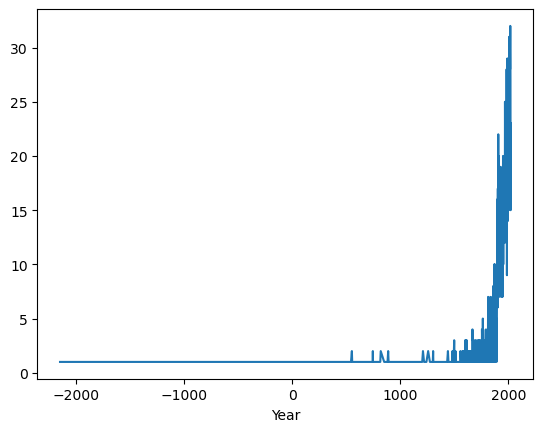

In [11]:
big.size().plot()

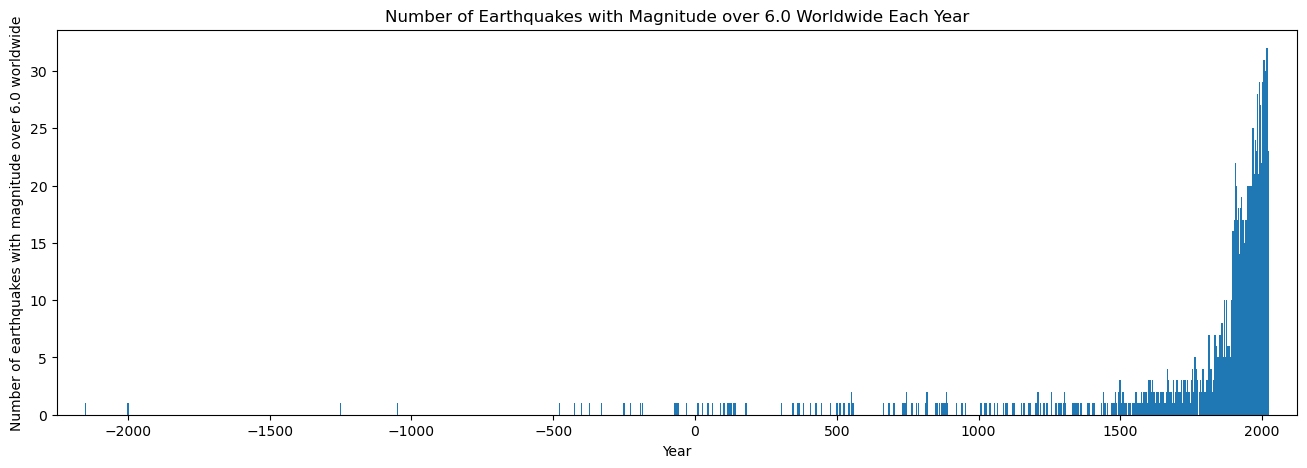

In [14]:
#1.2参考代码
#取Mag大于6的部分，根据年份进行分组，计算每组内有多少个数据
ysigeqs=Sig_Eqs[Sig_Eqs['Mag']>6].groupby(['Year'])['Mag'].count()
yearlist=ysigeqs.index
countlist=ysigeqs
# print(yearlist,countlist)

#设置图像大小，画柱状图，设置x轴范围和x/y坐标轴标签
plt.figure(figsize=(16,5))
plt.bar(yearlist,countlist,width=5)
plt.xlim(yearlist[0]-100,yearlist[-1]+100)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes with magnitude over 6.0 worldwide')
plt.title('Number of Earthquakes with Magnitude over 6.0 Worldwide Each Year')
plt.show()

## 1.3

In [29]:
def CountEq_LargestEq(country):
    a=Sig_Eqs.loc[Sig_Eqs['Country']==country].size() #.size()不适用，可使用len(）方法
    b=Sig_Eqs.loc[Sig_Eqs['Country']==country].sort_values("Mag", ascending=False).head(1).Year
    return a,b


In [28]:
#1.3参考代码

def CountEq_LargestEq(country):
    #取特定国家的数据，获取长度为地震数量
    eqn=len(Sig_Eqs[Sig_Eqs['Country']==country])
    #取特定国家的数据，根据Mag的值从大到小排序，第一列即震级最大的那次地震
    maMag=Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False)
    #取第一列的日期
    yr=int(maMag.iloc[0].Year)
    mo=maMag.iloc[0].Mo
    dy=maMag.iloc[0].Dy
    if np.isnan(mo):
        date=f'year {yr:04}'
        # print(country,date)
    elif np.isnan(dy):
        mo=int(mo)
        date=f'year/month {yr:04d}/{mo:02d}'
        # print(country,date)
    else:
        mo=int(mo)
        dy=int(dy)
        date=f'{yr:04d}/{mo:02d}/{dy:02d}'
    return eqn,date

#去掉nan    
Sig_Eqs1=Sig_Eqs[~pd.isnull(Sig_Eqs['Country'])]
#获取各个国家到list
countrylist=Sig_Eqs1['Country'].unique()
#对每个城市都使用方法，收集到一个DataFrame里
eqnlist=[]
datelist=[]
for country in countrylist:
    eqn,date=CountEq_LargestEq(country)
    eqnlist.append(eqn)
    datelist.append(date)
df1=pd.DataFrame()
df1['country']=countrylist
df1['number Of earthquakes']=eqnlist
df1['the date of the largest earthquake']=datelist
#根据地震数量从大到小排列
df1=df1.sort_values('number Of earthquakes',ascending=False)
df1

,country,number Of earthquakes,the date of the largest earthquake
14,CHINA,620,1668/07/25
33,JAPAN,414,2011/03/11
68,INDONESIA,411,2004/12/26
7,IRAN,384,0856/12/22
9,TURKEY,335,2023/02/06
...,...,...,...
93,NORWAY,1,1819/08/31
126,CENTRAL AFRICAN REPUBLIC,1,1921/09/16
124,PALAU,1,1914/10/23
118,KIRIBATI,1,1905/06/30


=========================================
# 2 Windspeed
1/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——完成了对WND列的分解；没有筛选数据，获取的风速能达到月平均100m/s以上不符合常识；获取的月平均风速是多年的月际风速变化，而题目要求呈现的是10年内连续的月平均风速变化；没有在报告或代码中汇报趋势  

注意代码：wind_speed.groupby(['MONTH']).mean()['d'].plot() 不同的库版本可能报错，需修改为wind_speed.groupby(['MONTH'])['d'].mean().plot()；修改后更符合逻辑：先groupby再分组，选择变量d然后计算均值，再plot  

In [32]:
wind_speed = pd.read_csv(R"C:\Program1\jupyter_notebook\ese5023\2281305.csv")

C:\Users\zsh\AppData\Local\Temp\ipykernel_17896\3092203033.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_speed = pd.read_csv(R"C:\Program1\jupyter_notebook\ese5023\2281305.csv")


In [34]:
wind_speed['DATE'] = wind_speed['DATE'].astype('str')

In [35]:
wind_speed['DATE'] = pd.to_datetime(wind_speed['DATE'])

In [36]:
wind_speed['YEAR'] = wind_speed['DATE'].dt.year

In [37]:
wind_speed['MONTH'] = wind_speed['DATE'].dt.month

In [38]:
wind_speed['DAY'] = wind_speed['DATE'].dt.day

In [39]:
wind_speed

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND,YEAR,MONTH,DAY
0,59493099999,2010-01-02 00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1",2010,1,2
1,59493099999,2010-01-02 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1",2010,1,2
2,59493099999,2010-01-02 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1",2010,1,2
3,59493099999,2010-01-02 03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1",2010,1,2
4,59493099999,2010-01-02 04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1",2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11 17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1",2020,9,11
111980,59493099999,2020-09-11 18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1",2020,9,11
111981,59493099999,2020-09-11 19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1",2020,9,11
111982,59493099999,2020-09-11 20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1",2020,9,11


In [40]:
wind_speed[['a','b','c','d','e']] = wind_speed.WND.str.split(',', expand = True)
wind_speed.drop(axis = 1, columns = 'WND', inplace = True)


In [43]:
wind_speed


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,TMP,VIS,YEAR,MONTH,DAY,a,b,c,d,e
0,59493099999,2010-01-02 00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,"+0161,1","004000,1,N,1",2010,1,2,040,1,N,0020,1
1,59493099999,2010-01-02 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,"+0170,1","002600,1,N,1",2010,1,2,999,9,V,0010,1
2,59493099999,2010-01-02 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,"+0180,1","002600,1,N,1",2010,1,2,999,9,C,0000,1
3,59493099999,2010-01-02 03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,"+0192,1","005000,1,N,1",2010,1,2,140,1,N,0010,1
4,59493099999,2010-01-02 04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,"+0180,1","002100,1,N,1",2010,1,2,300,1,N,0040,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11 17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0290,1","009999,1,9,9",2020,9,11,170,1,N,0030,1
111980,59493099999,2020-09-11 18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0290,1","009999,1,9,9",2020,9,11,180,1,N,0040,1
111981,59493099999,2020-09-11 19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0290,1","009999,1,9,9",2020,9,11,220,1,V,0030,1
111982,59493099999,2020-09-11 20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"+0290,1","009999,1,9,9",2020,9,11,260,1,N,0030,1


In [44]:
wind_speed['d'] = wind_speed['d'].astype('float')

<Axes: xlabel='MONTH'>

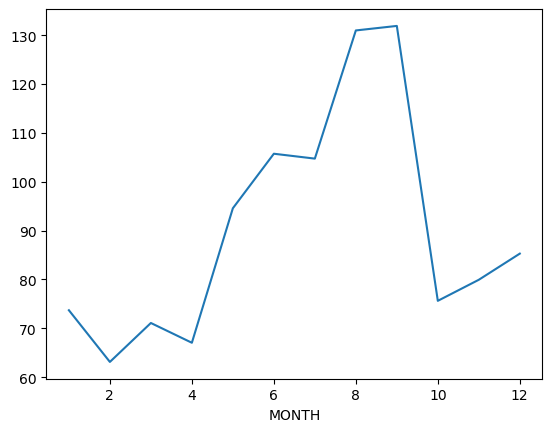

In [48]:
# wind_speed.groupby(['MONTH']).mean()['d'].plot()
#TA changed
wind_speed.groupby(['MONTH'])['d'].mean().plot()

In [49]:
#参考代码
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#读取文件，查看文件信息
ws=pd.read_csv('2281305.csv',header=0,low_memory=False)
# print(ws.columns,ws.head(5))
#选取有效数据，进行数据处理，记得有scaling factor
ws=ws[['DATE','WND']]
ws[['direction_angle','direction_quality','type','speed','speed_quality']]=ws['WND'].str.split(',',expand=True)
ws['speed']=ws['speed'].astype(float)/10
ws[['yyyy','mm','ddHHMMSS']]=ws['DATE'].str.split('-',expand=True)
ws['yyyymm']=ws['yyyy'].astype(str)+'-'+ws['mm'].astype(str)
# print(ws.speed.max())
#根据user guide进行质量控制
#bad quality1: type==9
ws=ws[ws['type']!='9']
#bad quality2: windspeed>90 or windspeed<0
ws=ws[(ws['speed']>=0) & (ws['speed']<=90)]
#bad quality3: speed_quality=2,3,6,7
ws=ws[ws['speed_quality'].isin(['0','1','4','5','9'])]
#根据年月分组对风速取平均，并绘制时间序列
wsg=ws.groupby('yyyymm')['speed'].mean()
plt.figure(figsize=(12,5))
wsg.plot(xlabel='Month',ylabel='wind speed (m/s)',title='Monthly Averaged Wind Speed in Shenzhen',grid=True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '2281305.csv'

=========================================
# 3 Free Exploration
5/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据 5/5  
3.2 画出某个变量的时间序列——未能成功画出，njc的类型是<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001D5B7607F10>，难以直接绘图，注意使用groupby方法后需要加统计量，如njc=nj.loc[nj['TAVG (Degrees Fahrenheit)'] !="NaN"].groupby(['Date']).mean() 0/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现 0/5


In [2]:
import pandas as pd
nj = pd.read_csv("data.csv")

In [51]:
nj

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1951/1/1,NaN,53.0,38.0,0.00,NaN,NaN
1,1951/1/2,42.0,45.0,39.0,0.01,NaN,NaN
2,1951/1/3,44.0,52.0,40.0,0.00,NaN,NaN
3,1951/1/4,44.0,58.0,34.0,0.00,NaN,NaN
4,1951/1/5,49.0,62.0,40.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...
26596,2023/10/29,65.0,NaN,NaN,0.00,NaN,NaN
26597,2023/10/30,65.0,NaN,NaN,0.00,NaN,NaN
26598,2023/10/31,67.0,NaN,NaN,0.00,NaN,NaN
26599,2023/11/1,69.0,NaN,NaN,0.00,NaN,NaN


In [3]:
nj.dropna(
    axis=1,
    how='all'
)


,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNWD (Inches)
0,1951/1/1,NaN,53.0,38.0,0.00,NaN
1,1951/1/2,42.0,45.0,39.0,0.01,NaN
2,1951/1/3,44.0,52.0,40.0,0.00,NaN
3,1951/1/4,44.0,58.0,34.0,0.00,NaN
4,1951/1/5,49.0,62.0,40.0,0.00,NaN
...,...,...,...,...,...,...
26596,2023/10/29,65.0,NaN,NaN,0.00,NaN
26597,2023/10/30,65.0,NaN,NaN,0.00,NaN
26598,2023/10/31,67.0,NaN,NaN,0.00,NaN
26599,2023/11/1,69.0,NaN,NaN,0.00,NaN


In [6]:
njc=nj.loc[nj['TAVG (Degrees Fahrenheit)'] !="NaN"].groupby(['Date'])
njc

In [54]:
njc.plot()

KeyboardInterrupt: 